In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format

In [3]:
train_df=pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df=pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [6]:
scale_factor=1000.0
train_df["median_house_value"]/=scale_factor
test_df["median_house_value"]/=scale_factor

In [17]:
def build_model(my_learning_rate):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):
    history=model.fit(x=df[feature],
                    y=df[label], 
                    batch_size=my_batch_size,
                    epochs=my_epochs,
                    validation_split=my_validation_split)
    trained_weight=model.get_weights()[0]
    trained_bias=model.get_weights()[1]
    epochs=history.epoch
    hist=pd.DataFrame(history.history)
    rmse=hist["root_mean_squared_error"]
    
    return epochs, rmse, history.history

In [9]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()  

Train on 13600 samples, validate on 3400 samples
Epoch 1/30
13600/13600 [==============================] - 1s 60us/sample - loss: 41865.7591 - root_mean_squared_error: 204.6112 - val_loss: 31481.4786 - val_root_mean_squared_error: 177.4302
Epoch 2/30
13600/13600 [==============================] - 1s 43us/sample - loss: 24167.6012 - root_mean_squared_error: 155.4593 - val_loss: 17276.1557 - val_root_mean_squared_error: 131.4388
Epoch 3/30
13600/13600 [==============================] - 1s 39us/sample - loss: 12958.5323 - root_mean_squared_error: 113.8356 - val_loss: 9259.0268 - val_root_mean_squared_error: 96.2238
Epoch 4/30
13600/13600 [==============================] - 0s 36us/sample - loss: 7806.7338 - root_mean_squared_error: 88.3557 - val_loss: 6957.6387 - val_root_mean_squared_error: 83.4125
Epoch 5/30
13600/13600 [==============================] - 1s 41us/sample - loss: 7034.8568 - root_mean_squared_error: 83.8741 - val_loss: 6946.0723 - val_root_mean_squared_error: 83.3431
Epoch 

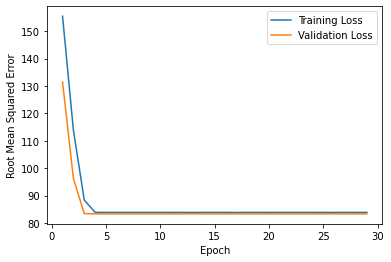

In [22]:
learning_rate = 0.08
epochs = 30
batch_size = 100
validation_split=0.2

my_feature="median_income"  
my_label="median_house_value"

my_model = None

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [16]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


In [23]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

3000/3000 [==============================] - 0s 13us/sample - loss: 7009.9382 - root_mean_squared_error: 83.7254
